In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import ssl
import certifi
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error


california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Price'] = california.target
california_df 

newX = np.array(california_df.drop('Price', axis=1))
newY = np.array(california_df['Price']).reshape(-1, 1)

newX = StandardScaler().fit_transform(newX)

print(f'Shape of newX: {newX.shape}, shape of newY: {newY.shape}')

Shape of newX: (20640, 8), shape of newY: (20640, 1)


In [23]:
N_train = len(newX) * .8

msk = np.random.rand(len(newX)) < 0.8

X_train, y_train = newX[msk], newY[msk]
X_test, y_test = newX[~msk], newY[~msk]

print(f"{X_train.shape=}, {X_test.shape=}")

X_train.shape=(16545, 8), X_test.shape=(4095, 8)


In [26]:
y_train.squeeze()

array([4.526, 3.422, 2.697, ..., 0.923, 0.847, 0.894], shape=(16545,))

In [7]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def ols_fit(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)

def ridge_fit(X, y, lam):
    d = X.shape[1]
    return np.linalg.solve(X.T @ X + lam * np.eye(d), X.T @ y)

In [8]:
w_ols = ols_fit(X_train, y_train)

train_mse_ols = mse(y_train, X_train @ w_ols)
test_mse_ols  = mse(y_test,  X_test  @ w_ols)

In [9]:
lambdas = [0.0, 0.1, 1.0, 10.0, 100.0]

results = []

# OLS entry (λ = 0)
results.append({
    "Model": "OLS",
    "Lambda": 0.0,
    "Train MSE": train_mse_ols,
    "Test MSE": test_mse_ols
})

# Ridge entries
for lam in lambdas[1:]:
    w = ridge_fit(X_train, y_train, lam)
    
    train_mse = mse(y_train, X_train @ w)
    test_mse  = mse(y_test,  X_test  @ w)
    
    results.append({
        "Model": "Ridge",
        "Lambda": lam,
        "Train MSE": train_mse,
        "Test MSE": test_mse
    })

In [10]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df

,Model,Lambda,Train MSE,Test MSE
0,OLS,0.0,4.793661,4.855990
1,Ridge,0.1,4.793661,4.855991
2,Ridge,1.0,4.793661,4.855993
3,Ridge,10.0,4.793670,4.856021
4,Ridge,100.0,4.794395,4.856780


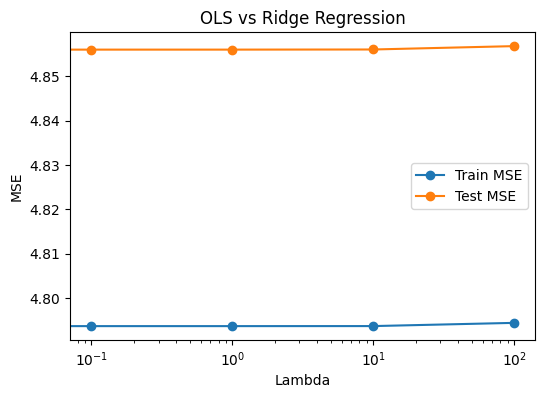

In [11]:
plt.figure(figsize=(6,4))
plt.plot(results_df["Lambda"], results_df["Train MSE"], marker="o", label="Train MSE")
plt.plot(results_df["Lambda"], results_df["Test MSE"], marker="o", label="Test MSE")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.legend()
plt.title("OLS vs Ridge Regression")
plt.show()

In [19]:
lambdas = [0.0, 0.1, 1.0, 10.0, 100.0]

results = []

# OLS row
results.append({
    "Model": "OLS",
    "Lambda": 0.0,
    "Train MSE": train_mse_ols,
    "Test MSE": test_mse_ols
})

# Ridge rows
for lam in lambdas[1:]:
    ridge = Ridge(alpha=lam, fit_intercept=True)
    ridge.fit(X_train, y_train)
    
    train_mse = mean_squared_error(y_train, ridge.predict(X_train))
    test_mse  = mean_squared_error(y_test,  ridge.predict(X_test))
    
    results.append({
        "Model": "Ridge",
        "Lambda": lam,
        "Train MSE": train_mse,
        "Test MSE": test_mse
    })

results_df = pd.DataFrame(results)
results_df

,Model,Lambda,Train MSE,Test MSE
0,OLS,0.0,4.793661,4.855990
1,Ridge,0.1,0.526165,0.517139
2,Ridge,1.0,0.526165,0.517150
3,Ridge,10.0,0.526173,0.517264
4,Ridge,100.0,0.526909,0.518929
